In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data_path = '../files/data/'

In [11]:
solve_vs_brute_force = pd.read_csv(data_path + 'solve_vs_brute_force.csv', header=None)
solve_vs_solve_parallel = pd.read_csv(data_path + 'solve_vs_solve_parallel.csv', header=None)
threads_comp = pd.read_csv(data_path + 'comparing_different_num_of_threads.csv', header=None)

solve_vs_brute_force.columns = ['instance_size', 'solver_t', 'time_in_ns']
solve_vs_solve_parallel.columns = ['instance_size', 'solver_t', 'time_in_ns']
threads_comp.columns = ['num_of_threads', 'time_in_ns']

solve_vs_brute_force['solver_t'] = solve_vs_brute_force['solver_t'].str.strip()
solve_vs_solve_parallel['solver_t'] = solve_vs_solve_parallel['solver_t'].str.strip()

# Solve vs Brute Force

In [12]:
solve_vs_brute_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   instance_size  280 non-null    int64 
 1   solver_t       280 non-null    object
 2   time_in_ns     280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


In [13]:
solve_vs_brute_force.head()

,instance_size,solver_t,time_in_ns
0,3,branch_bound,133292
1,3,brute_force,26459
2,3,branch_bound,84916
3,3,brute_force,27125
4,3,branch_bound,102000


In [14]:
solve_vs_brute_grouped = solve_vs_brute_force.groupby(['instance_size', 'solver_t'])['time_in_ns'].mean()
solve_vs_brute_grouped = solve_vs_brute_grouped.reset_index()
bb_data = solve_vs_brute_grouped[solve_vs_brute_grouped['solver_t'] == 'branch_bound']
bf_data = solve_vs_brute_grouped[solve_vs_brute_grouped['solver_t'] == 'brute_force']

bb_data

,instance_size,solver_t,time_in_ns
0,3,branch_bound,87760.40
2,4,branch_bound,196799.90
4,5,branch_bound,475337.60
6,6,branch_bound,1037616.65
8,7,branch_bound,2790116.85
10,8,branch_bound,9697622.85
12,9,branch_bound,30891658.40


In [15]:
bf_data

,instance_size,solver_t,time_in_ns
1,3,brute_force,2.430635e+04
3,4,brute_force,7.321260e+04
5,5,brute_force,2.900667e+05
7,6,brute_force,1.245700e+06
9,7,brute_force,7.823639e+06
11,8,brute_force,6.312300e+07
13,9,brute_force,6.123610e+08


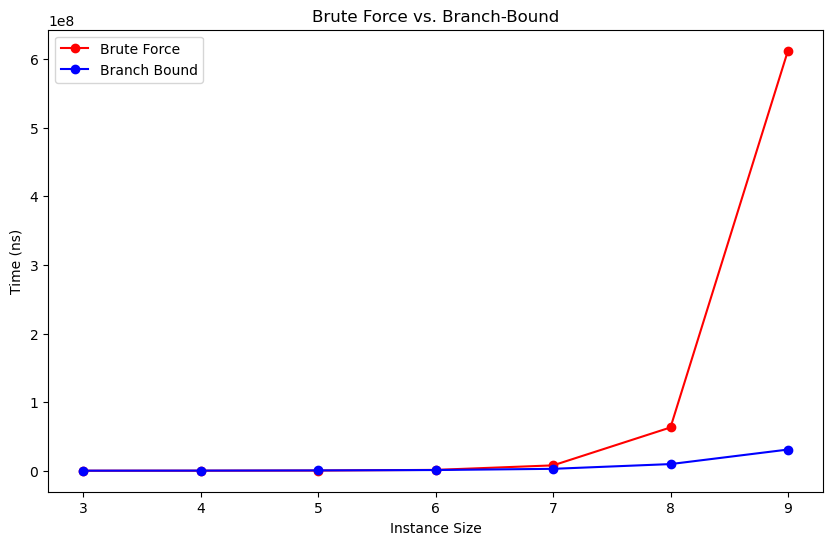

In [16]:
plt.figure(figsize=(10, 6))
plt.title("Brute Force vs. Branch-Bound")
plt.plot(bf_data['instance_size'], bf_data['time_in_ns'], label='Brute Force', marker='o', color='r')
plt.plot(bb_data['instance_size'], bb_data['time_in_ns'], label='Branch Bound', marker='o', color='b')
plt.xlabel("Instance Size")
plt.ylabel("Time (ns)")
plt.legend()
plt.savefig("brute_force_vs_branch_bound.png", format="png", dpi=300)
plt.show()

# Solve vs Solve Parallel

In [17]:
solve_vs_solve_parallel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   instance_size  440 non-null    int64 
 1   solver_t       440 non-null    object
 2   time_in_ns     440 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.4+ KB


In [18]:
solve_vs_solve_parallel.head()

,instance_size,solver_t,time_in_ns
0,3,bb,50500
1,3,bb_parallel,384667
2,3,bb,51000
3,3,bb_parallel,257083
4,3,bb,51250


In [19]:
solve_vs_solve_parallel = solve_vs_solve_parallel.groupby(['instance_size', 'solver_t'])['time_in_ns'].mean()
solve_vs_solve_parallel = solve_vs_solve_parallel.reset_index()
bbs_data = solve_vs_solve_parallel[solve_vs_solve_parallel['solver_t'] == 'bb']
bbp_data = solve_vs_solve_parallel[solve_vs_solve_parallel['solver_t'] == 'bb_parallel']

bbs_data

,instance_size,solver_t,time_in_ns
0,3,bb,4.827715e+04
2,4,bb,1.135146e+05
4,5,bb,3.294458e+05
6,6,bb,8.312354e+05
8,7,bb,2.516250e+06
10,8,bb,8.953100e+06
12,9,bb,2.406300e+07
14,10,bb,6.806392e+07
16,11,bb,2.240312e+08
18,12,bb,5.489947e+08


In [20]:
bbp_data

,instance_size,solver_t,time_in_ns
1,3,bb_parallel,2.428314e+05
3,4,bb_parallel,2.821250e+05
5,5,bb_parallel,3.677687e+05
7,6,bb_parallel,5.503751e+05
9,7,bb_parallel,9.798020e+05
11,8,bb_parallel,2.191227e+06
13,9,bb_parallel,4.996410e+06
15,10,bb_parallel,1.450315e+07
17,11,bb_parallel,4.747350e+07
19,12,bb_parallel,1.193904e+08


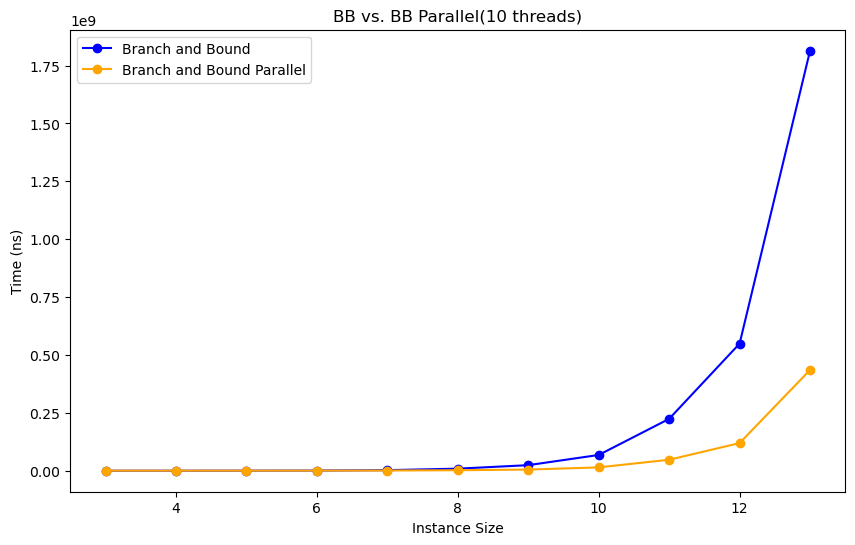

In [21]:
plt.figure(figsize=(10, 6))
plt.title("BB vs. BB Parallel(10 threads)")
plt.plot(bbs_data['instance_size'], bbs_data['time_in_ns'], label='Branch and Bound', marker='o', color='blue')
plt.plot(bbp_data['instance_size'], bbp_data['time_in_ns'], label='Branch and Bound Parallel', marker='o', color='orange')
plt.xlabel("Instance Size")
plt.ylabel("Time (ns)")
plt.legend()
plt.savefig("synchronized_vs_parallel_bb.png", format="png", dpi=300)
plt.show()

# Comparing Threads

In [22]:
threads_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   num_of_threads  180 non-null    int64
 1   time_in_ns      180 non-null    int64
dtypes: int64(2)
memory usage: 2.9 KB


In [23]:
threads_comp.head()

,num_of_threads,time_in_ns
0,2,4097875
1,3,2753583
2,4,2481792
3,5,2206334
4,6,1654042


In [24]:
threads_comp = threads_comp.groupby(['num_of_threads'])['time_in_ns'].mean()
threads_comp = threads_comp.reset_index()
threads_comp.head()

,num_of_threads,time_in_ns
0,2,5594568.85
1,3,4059043.65
2,4,3263318.75
3,5,2822091.75
4,6,2468375.05


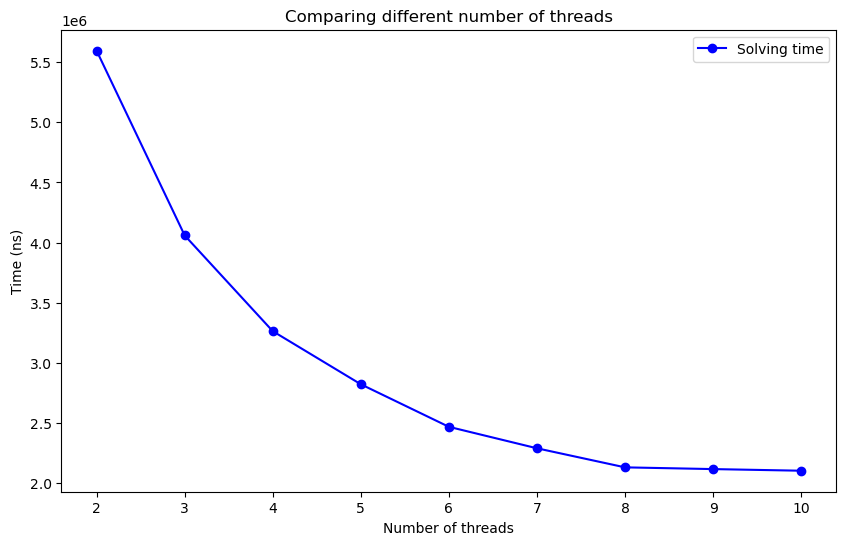

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Comparing different number of threads")
plt.plot(threads_comp['num_of_threads'], threads_comp['time_in_ns'], label='Solving time', marker='o', color='blue')
plt.xlabel("Number of threads")
plt.ylabel("Time (ns)")
plt.legend()
plt.savefig("algorithm_speedup_across_thread_counts.png", format="png", dpi=300)
plt.show()